# Finals
## Prob. 2

In [72]:
import torch
import matplotlib.pyplot as plt
from torch import nn

$
d\omega = 0
$

$
\phi = 0
$

$
\Omega \times V_{0} = 1
$

$
\Delta t = 0.001
$

$
U(t=0) = 
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}
$

In [73]:
dw = 1.2
phi = 0
om_v0 = 1
dt = 0.001

u0 = torch.tensor([[1, 0], [0, 1]]) * (1. + 0j)

$
H(t) = -\frac{1}{2} \Omega V_{0} s(t) 
\begin{pmatrix}
0                        & e^{i(\text{d} \omega t + \phi)} \\
e^{-i(\text{d} \omega t + \phi)} & 0                       \\
\end{pmatrix}
$

In [74]:
def H(s_t, T):
    t = T*dt
    y = -0.5 * om_v0 * s_t * torch.tensor([[0, torch.exp(torch.tensor(+1j * (dw*t + phi)))], 
                                           [torch.exp(torch.tensor(-1j * (dw*t + phi))), 0]])
    return y

In [75]:
input_size = 32
hidden_layer_overlaps = 3

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        layers = []
        in_features = input_size * 8
        last_in_features = in_features
        out_features = input_size * 16

        for _ in range(hidden_layer_overlaps):
            layers.append(nn.Linear(in_features, out_features))
            layers.append(nn.ReLU())
            in_features = out_features
            out_features //= 2  # 출력 차원 줄이는 정도 (=나누기 2)
        layers.append(nn.Linear(in_features, last_in_features))  # last layer  # input_size*1

        self.fcn = nn.Sequential(*layers)  # Fully Connected Network

    def forward(self, x):
        y = self.fcn(x)
        return y

$
P = \big|
\begin{pmatrix}
0 & 1 \\
\end{pmatrix}
U(t)
\begin{pmatrix}
1 \\
0 \\
\end{pmatrix}
\big| ^2
$

tensor([78.9828], grad_fn=<AddBackward0>)
tensor([75.5506], grad_fn=<AddBackward0>)
tensor([71.8474], grad_fn=<AddBackward0>)
tensor([67.8623], grad_fn=<AddBackward0>)
tensor([63.6664], grad_fn=<AddBackward0>)
tensor([59.4268], grad_fn=<AddBackward0>)
tensor([55.3661], grad_fn=<AddBackward0>)
tensor([51.6924], grad_fn=<AddBackward0>)
tensor([48.5467], grad_fn=<AddBackward0>)
tensor([45.9805], grad_fn=<AddBackward0>)
tensor([43.9635], grad_fn=<AddBackward0>)
tensor([42.4154], grad_fn=<AddBackward0>)
tensor([41.2434], grad_fn=<AddBackward0>)
tensor([40.3625], grad_fn=<AddBackward0>)
tensor([39.7045], grad_fn=<AddBackward0>)
tensor([39.2164], grad_fn=<AddBackward0>)
tensor([38.8572], grad_fn=<AddBackward0>)
tensor([38.5946], grad_fn=<AddBackward0>)
tensor([38.4034], grad_fn=<AddBackward0>)
tensor([38.2642], grad_fn=<AddBackward0>)
tensor([38.1625], grad_fn=<AddBackward0>)
tensor([38.0877], grad_fn=<AddBackward0>)
tensor([38.0321], grad_fn=<AddBackward0>)
tensor([37.9904], grad_fn=<AddBack

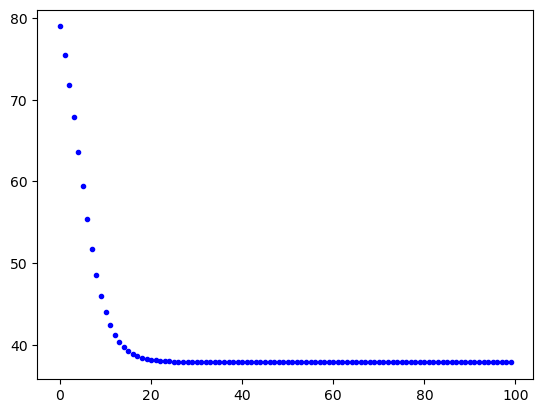

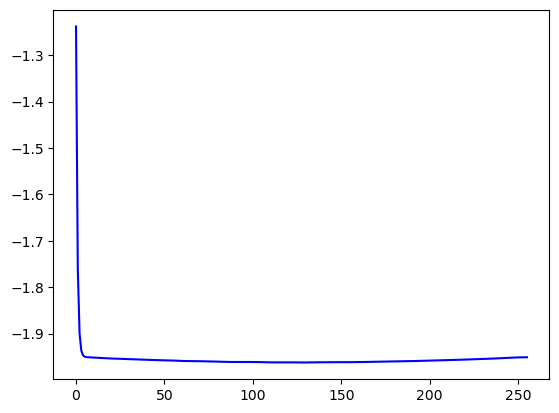

tensor([[ 0.9694-0.0031j,  0.0377-0.2431j],
        [-0.0377-0.2431j,  0.9694+0.0031j]], grad_fn=<AddBackward0>)


In [76]:
learning_rate = 1e-3

model = NeuralNet()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # lr = learning rate

loss_list = []
epoch_range = 1000+1
export_epoch = 10
T_size = input_size * 8

for epoch in range(epoch_range):
    input_t = torch.arange(T_size) * dt
    st = model(input_t)
    model.train()

    ut = u0.detach().clone()

    for T in range(1, T_size):
        dudt = -1j * torch.matmul(H(st[T], T), ut)
        ut = ut + dudt*dt
    
    p = torch.square(torch.matmul(torch.matmul(torch.tensor([[0, 1]]) * (1. + 0j), ut), torch.tensor([[1], [0]])*(1. + 0j)).abs())[0]
    # p_scalar = p.sum()
    # print(p, torch.log(p))
    # scalar_value = p.item()

    # loss = -torch.log(p_scalar).requires_grad_(True)
    loss = (10 * torch.log(p).abs().requires_grad_(True) 
            + 0.01 * (torch.sum((torch.diff(st)**2) + torch.sum(torch.var(st)))).requires_grad_(True)
            + 0.01 * torch.sum(st**2).requires_grad_(True))
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % export_epoch == 1:  # export_epoch = 10
        print(loss)
        # print(ut)
        # plt.plot(st.detach().numpy(), 'b')
        # plt.show()
        loss_list.append(loss.item())

plt.plot(loss_list, 'b.')
plt.show()

plt.plot(st.detach().numpy(), 'b')
plt.show()
print(ut)